# Welcome to Jupyter!

This repo contains an introduction to [Jupyter](https://jupyter.org) and [IPython](https://ipython.org).

Outline of some basics:

* [Notebook Basics](../examples/Notebook/Notebook Basics.ipynb)
* [IPython - beyond plain python](../examples/IPython Kernel/Beyond Plain Python.ipynb)
* [Markdown Cells](../examples/Notebook/Working With Markdown Cells.ipynb)
* [Rich Display System](../examples/IPython Kernel/Rich Output.ipynb)
* [Custom Display logic](../examples/IPython%20Kernel/Custom%20Display%20Logic.ipynb)
* [Running a Secure Public Notebook Server](../examples/Notebook/Running%20the%20Notebook%20Server.ipynb#Securing-the-notebook-server)
* [How Jupyter works](../examples/Notebook/Multiple%20Languages%2C%20Frontends.ipynb) to run code in different languages.

You can also get this tutorial and run it on your laptop:

    git clone https://github.com/ipython/ipython-in-depth

Install IPython and Jupyter:

with [conda](https://www.anaconda.com/download):

    conda install ipython jupyter

with pip:

    # first, always upgrade pip!
    pip install --upgrade pip
    pip install --upgrade ipython jupyter

Start the notebook in the tutorial directory:

    cd ipython-in-depth
    jupyter notebook

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
sns.set(style="white")

    100% |████████████████████████████████| 184kB 2.3MB/s ta 0:00:01
  Running setup.py bdist_wheel for seaborn ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/26/0a/44/53ddd89769e62f7c6691976375b86c6492e7dd20a2d3970e32
Successfully built seaborn
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [15]:
X, y = make_classification(200, 2, 2, 0, weights=[.5, .5], random_state=15)
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]

In [16]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

# calculate the cross-entropy error
def cross_entropy(T, Y):
    E = 0
    for i in range(len(T)):
        if T[i] == 1:
            E -= np.log(Y[i])
        else:
            E -= np.log(1 - Y[i])
    return E

In [17]:
N = X.shape[0]
D = X.shape[1]
print(N, D)

200 2


In [18]:
# add a column of ones
ones = np.ones((N, 1))
Xb = np.concatenate((ones, X[:]), axis=1)

In [19]:
Xb[:10]

array([[ 1.        ,  0.82944377,  0.87469415],
       [ 1.        , -1.35989641, -0.60275371],
       [ 1.        ,  0.35466551, -0.50966937],
       [ 1.        , -1.71088888,  1.38437071],
       [ 1.        , -1.07617622, -1.00007067],
       [ 1.        ,  0.47945457, -0.24220938],
       [ 1.        , -0.42490458,  2.08261939],
       [ 1.        ,  0.41906228, -0.2525939 ],
       [ 1.        , -0.38432027, -0.13768226],
       [ 1.        ,  1.31672259,  1.29342882]])

In [20]:
# randomly initialize the weights
w = np.random.randn(D + 1)

In [21]:
# calculate the model output
z = Xb.dot(w)

In [22]:
Y = sigmoid(z)

In [23]:
# let's do gradient descent 100 times
learning_rate = 0.01
losses = []
weights = []
for i in range(200):
    loss = cross_entropy(y, Y)
    if i % 10 == 0:
        print(loss)
    
    losses.append(loss)
    weights.append(w)
    # gradient descent weight udpate with regularization
    # w += learning_rate * ( np.dot((T - Y).T, Xb) - 0.1*w ) # old
    w += learning_rate * (Xb.T.dot(y - Y) - 0.1 * w)

    # recalculate Y
    Y = sigmoid(Xb.dot(w))

182.45445676989667
52.70102951900349
50.43419340454064
49.85091923838835
49.64072730429973
49.55161538210619
49.509654405812064
49.48826937955397
49.47665055878097
49.46999777088154
49.46602412185563
49.46357125130072
49.46201909747093
49.46101892440412
49.46036603092026
49.45993594505524
49.45965084411956
49.45946103619008
49.45933429860239
49.45924950532131


In [24]:
print("Final w:", w)

Final w: [-0.09114691 -1.04324556  3.1413222 ]


In [25]:
# add a column of ones
ones = np.ones((len(grid)))
grid_b = np.c_[ones.ravel(), xx.ravel(), yy.ravel()]

In [33]:
print(grid_b.shape)
z = grid_b.dot(w)
probs = sigmoid(z).reshape(xx.shape)
probs.shape

(1000000, 3)


(1000, 1000)

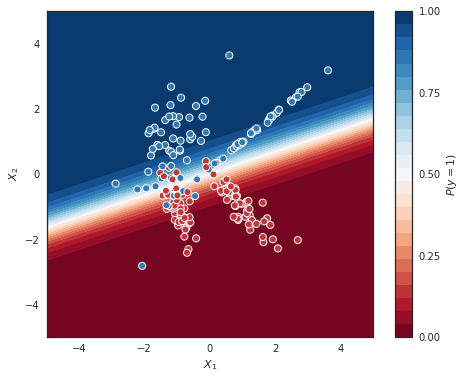

In [34]:
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[:,0], X[:, 1], c=y[:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")
plt.show()